# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
#Your code here
# Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import os

# Deep Learning Frameworks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Rescaling, Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# Core libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For older augmentation workflows
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomCrop, Rescaling
from tensorflow.keras.utils import image_dataset_from_directory  # For creating datasets from directories


# For Dataset Handling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Miscellaneous
import cv2  # For image processing
import seaborn as sns  # For data visualization
import random  # For reproducibility



**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [2]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\ameya\\OneDrive\\Desktop\\New folder (2)",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [3]:
data_iterator=data.as_numpy_iterator()

In [4]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

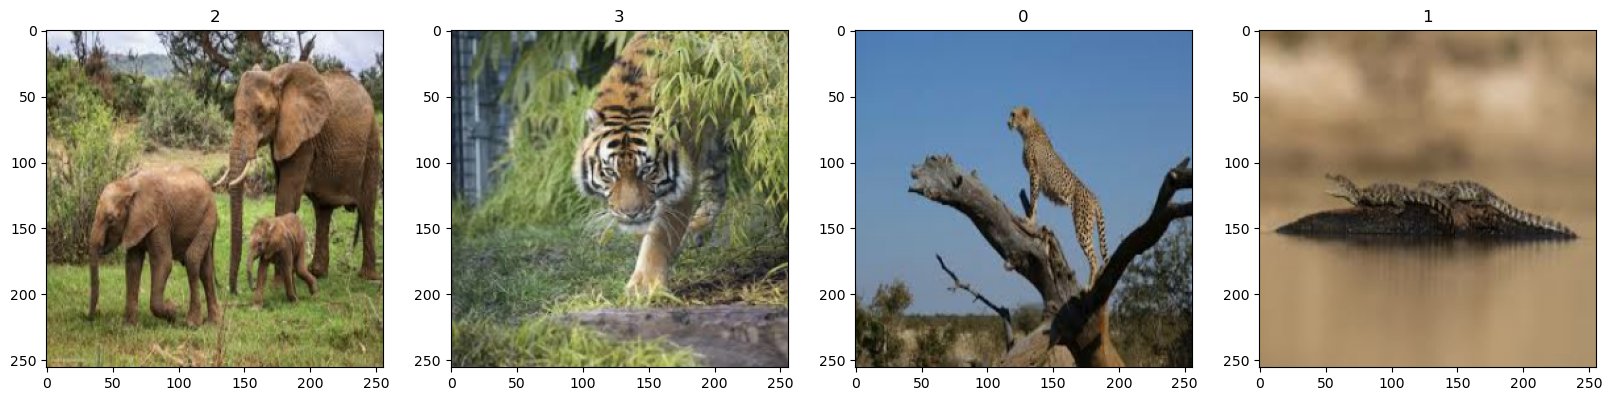

In [5]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [12]:
def rescale(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    return x, y

data=data.map(lambda x, y: rescale((x), y))


**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [17]:
#Your code here
dataset_size = data.cardinality().numpy()

# Define split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Calculate split sizes
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)

# Shuffle the dataset (optional, for randomness)
dataset = data.shuffle(buffer_size=dataset_size, seed=42)

# Split the dataset
train_dataset = dataset.take(train_size)
remaining_dataset = dataset.skip(train_size)
val_dataset = remaining_dataset.take(val_size)
test_dataset = remaining_dataset.skip(val_size)

# Print dataset sizes for verification
print(f"Train size: {train_size}, Validation size: {val_size}, Test size: {dataset_size - train_size - val_size}")
print(train_dataset)
for images, labels in train_dataset.take(1):
    print("Batch images shape:", images.shape)  # Expected: (batch_size, 256, 256, 3)
    print("Batch labels shape:", labels.shape)  # Expected: (batch_size,)


Train size: 36, Validation size: 10, Test size: 6
<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Batch images shape: (32, 256, 256, 3)
Batch labels shape: (32,)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [18]:
model=Sequential()

model.add(Conv2D(32, (3, 3), strides=1, input_shape=(256, 256, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding ='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), strides=1, input_shape=(256, 256, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding ='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

**Q.6** Compile your model

In [19]:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])


**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [20]:
model.fit(train_dataset, epochs = 25,
          validation_data=val_dataset)



Epoch 1/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.3159 - loss: 53.3658 - val_accuracy: 0.3312 - val_loss: 22.5342
Epoch 2/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4105 - loss: 29.5296 - val_accuracy: 0.2781 - val_loss: 21.2455
Epoch 3/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.4728 - loss: 16.5198 - val_accuracy: 0.2500 - val_loss: 12.7203
Epoch 4/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.4428 - loss: 11.1880 - val_accuracy: 0.3694 - val_loss: 16.2215
Epoch 5/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5401 - loss: 5.6850 - val_accuracy: 0.2656 - val_loss: 16.2570
Epoch 6/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5335 - loss: 2.5361 - val_accuracy: 0.2707 - val_loss: 18.3170
Epoch 7/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.6320 - loss: 1.3026 - val_accuracy: 0.3248 - val_loss: 13.4764
Epoch 8/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6600 - loss: 0.9431 - val_accuracy: 0.2562 

**Q.8** Test your code with test set

In [21]:
loss,accuracy=model.evaluate(test_dataset)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.4725 - loss: 5.0718


In [22]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Try again, not enough accuracy! Your accuracy is 0.4635416567325592


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**